In [1]:
# TODO: adjust spectra code as to map pert -> spectral parameter 

In [1]:
import os.path

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
import scanpy as sc
from src.utils.spectra.dataset import SpectraDataset
from src.utils.spectra.perturb import Spectra
from gears import PertData
import pickle as pkl


In [2]:
class PerturbGraphData(SpectraDataset):
    def parse(self, pert_data):
        if isinstance(pert_data, PertData):
            self.adata = pert_data.adata
        else:
            self.adata = pert_data
        self.control_expression = self.adata[self.adata.obs['condition'] == 'ctrl'].X.toarray().mean(axis=0)
        return [p for p in self.adata.obs['condition'].unique() if p != 'ctrl']

    def get_mean_logfold_change(self, perturbation):
        perturbation_expression = self.adata[self.adata.obs['condition'] == perturbation].X.toarray().mean(axis=0)
        logfold_change = np.nan_to_num(np.log2(perturbation_expression + 1) - np.log2(self.control_expression + 1))
        return logfold_change

    def sample_to_index(self, sample):
        if not hasattr(self, 'index_to_sequence'):
            print("Generating index to sequence")
            self.index_to_sequence = {}
            for i in tqdm(range(len(self))):
                x = self.__getitem__(i)
                self.index_to_sequence['-'.join(list(x))] = i

        return self.index_to_sequence[sample]
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        perturbation = self.samples[idx]
        return self.get_mean_logfold_change(perturbation)

In [3]:
class SPECTRAPerturb(Spectra):
    def spectra_properties(self, sample_one, sample_two):
        return -np.linalg.norm(sample_one - sample_two)

    def cross_split_overlap(self, train, test):
        average_similarity = []

        for i in test:
            for j in train:
                average_similarity.append(self.spectra_properties(i, j))

        return np.mean(average_similarity)

In [4]:
adata = sc.read('../data/norman_2019_raw.h5ad')

In [5]:
nonzero_genes = (adata.X.sum(axis=0) > 5).A1
filtered_adata = adata[:, nonzero_genes]
single_gene_mask = [True if "," not in name else False for name in adata.obs['guide_ids']]
sg_adata = filtered_adata[single_gene_mask, :]
sg_adata.obs['condition'] = sg_adata.obs['guide_ids'].replace('', 'ctrl')

genes = sg_adata.var['gene_symbols'].to_list()
genes_and_ctrl = genes + ['ctrl']

# we remove the cells with perts that are not in the genes because we need gene expression values
# to generate an in-silico perturbation embedding
sg_pert_adata = sg_adata[sg_adata.obs['condition'].isin(genes_and_ctrl), :]

In [6]:
perturb_graph_data = PerturbGraphData(sg_pert_adata, 'norman')

In [35]:
sc_spectra = SPECTRAPerturb(perturb_graph_data, binary = False)

In [32]:
sc_spectra.pre_calculate_spectra_properties('sc_norman', force_recalculate = True)

  0%|          | 0/102 [00:00<?, ?it/s]

TSC22D1
MAML2
<class 'numpy.ndarray'>
TSC22D1
CEBPE
<class 'numpy.ndarray'>
TSC22D1
DUSP9
<class 'numpy.ndarray'>
TSC22D1
ELMSAN1
<class 'numpy.ndarray'>
TSC22D1
UBASH3B
<class 'numpy.ndarray'>
TSC22D1
FOXA1
<class 'numpy.ndarray'>
TSC22D1
BCORL1
<class 'numpy.ndarray'>
TSC22D1
MEIS1
<class 'numpy.ndarray'>
TSC22D1
GLB1L2
<class 'numpy.ndarray'>
TSC22D1
KLF1
<class 'numpy.ndarray'>
TSC22D1
BAK1
<class 'numpy.ndarray'>
TSC22D1
FEV
<class 'numpy.ndarray'>
TSC22D1
ATL1
<class 'numpy.ndarray'>
TSC22D1
CBL
<class 'numpy.ndarray'>
TSC22D1
ETS2
<class 'numpy.ndarray'>
TSC22D1
SET
<class 'numpy.ndarray'>
TSC22D1
TBX3
<class 'numpy.ndarray'>
TSC22D1
LHX1
<class 'numpy.ndarray'>
TSC22D1
SLC4A1
<class 'numpy.ndarray'>
TSC22D1
RREB1
<class 'numpy.ndarray'>
TSC22D1
ZNF318
<class 'numpy.ndarray'>
TSC22D1
COL2A1
<class 'numpy.ndarray'>
TSC22D1
ZBTB25
<class 'numpy.ndarray'>
TSC22D1
MAP4K5
<class 'numpy.ndarray'>
TSC22D1
SLC6A9
<class 'numpy.ndarray'>
TSC22D1
MIDN
<class 'numpy.ndarray'>
TSC22D1
DLX2


  1%|          | 1/102 [00:02<04:33,  2.70s/it]

<class 'numpy.ndarray'>
TSC22D1
ZBTB10
<class 'numpy.ndarray'>
TSC22D1
PTPN13
<class 'numpy.ndarray'>
TSC22D1
SLC38A2
<class 'numpy.ndarray'>
TSC22D1
HOXA13
<class 'numpy.ndarray'>
TSC22D1
SNAI1
<class 'numpy.ndarray'>
TSC22D1
CITED1
<class 'numpy.ndarray'>
TSC22D1
PRDM1
<class 'numpy.ndarray'>
TSC22D1
HK2
<class 'numpy.ndarray'>
TSC22D1
EGR1
<class 'numpy.ndarray'>
TSC22D1
KIF18B
<class 'numpy.ndarray'>
TSC22D1
CDKN1C
<class 'numpy.ndarray'>
MAML2
CEBPE
<class 'numpy.ndarray'>
MAML2
DUSP9
<class 'numpy.ndarray'>
MAML2
ELMSAN1
<class 'numpy.ndarray'>
MAML2
UBASH3B
<class 'numpy.ndarray'>
MAML2
FOXA1
<class 'numpy.ndarray'>
MAML2
BCORL1
<class 'numpy.ndarray'>
MAML2
MEIS1
<class 'numpy.ndarray'>
MAML2
GLB1L2
<class 'numpy.ndarray'>
MAML2
KLF1
<class 'numpy.ndarray'>
MAML2
BAK1
<class 'numpy.ndarray'>
MAML2
FEV
<class 'numpy.ndarray'>
MAML2
ATL1
<class 'numpy.ndarray'>
MAML2
CBL
<class 'numpy.ndarray'>
MAML2
ETS2
<class 'numpy.ndarray'>
MAML2
SET
<class 'numpy.ndarray'>
MAML2
TBX3
<class

  2%|▏         | 2/102 [00:05<04:14,  2.55s/it]

<class 'numpy.ndarray'>
MAML2
PRDM1
<class 'numpy.ndarray'>
MAML2
HK2
<class 'numpy.ndarray'>
MAML2
EGR1
<class 'numpy.ndarray'>
MAML2
KIF18B
<class 'numpy.ndarray'>
MAML2
CDKN1C
<class 'numpy.ndarray'>
CEBPE
DUSP9
<class 'numpy.ndarray'>
CEBPE
ELMSAN1
<class 'numpy.ndarray'>
CEBPE
UBASH3B


  2%|▏         | 2/102 [00:05<04:23,  2.64s/it]


<class 'numpy.ndarray'>
CEBPE



KeyboardInterrupt



In [12]:
spectra_parameters = {'number_repeats': 3, 
                      'random_seed': [42, 44, 46],
                      'spectral_parameters': ["{:.2f}".format(i) for i in np.arange(0, 1.01, 0.1)],
                      'force_reconstruct': True,
                                              }
sc_spectra.generate_spectra_splits(**spectra_parameters)

Generating SPECTRA split for spectral parameter 0.0 and dataset norman
Number of samples in independent set: 102
Train size: 81	Test size: 21
Cross split overlap: -12.70486068725586



Generating SPECTRA split for spectral parameter 0.0 and dataset norman
Number of samples in independent set: 102
Train size: 81	Test size: 21
Cross split overlap: -12.145658493041992



Generating SPECTRA split for spectral parameter 0.0 and dataset norman
Number of samples in independent set: 102
Train size: 81	Test size: 21
Cross split overlap: -13.010405540466309



Generating SPECTRA split for spectral parameter 0.1 and dataset norman
Number of samples in independent set: 80
Train size: 64	Test size: 16
Cross split overlap: -13.770183563232422



Generating SPECTRA split for spectral parameter 0.1 and dataset norman
Number of samples in independent set: 81
Train size: 64	Test size: 17
Cross split overlap: -13.039514541625977



Generating SPECTRA split for spectral parameter 0.1 and dataset norman
Nu

[]

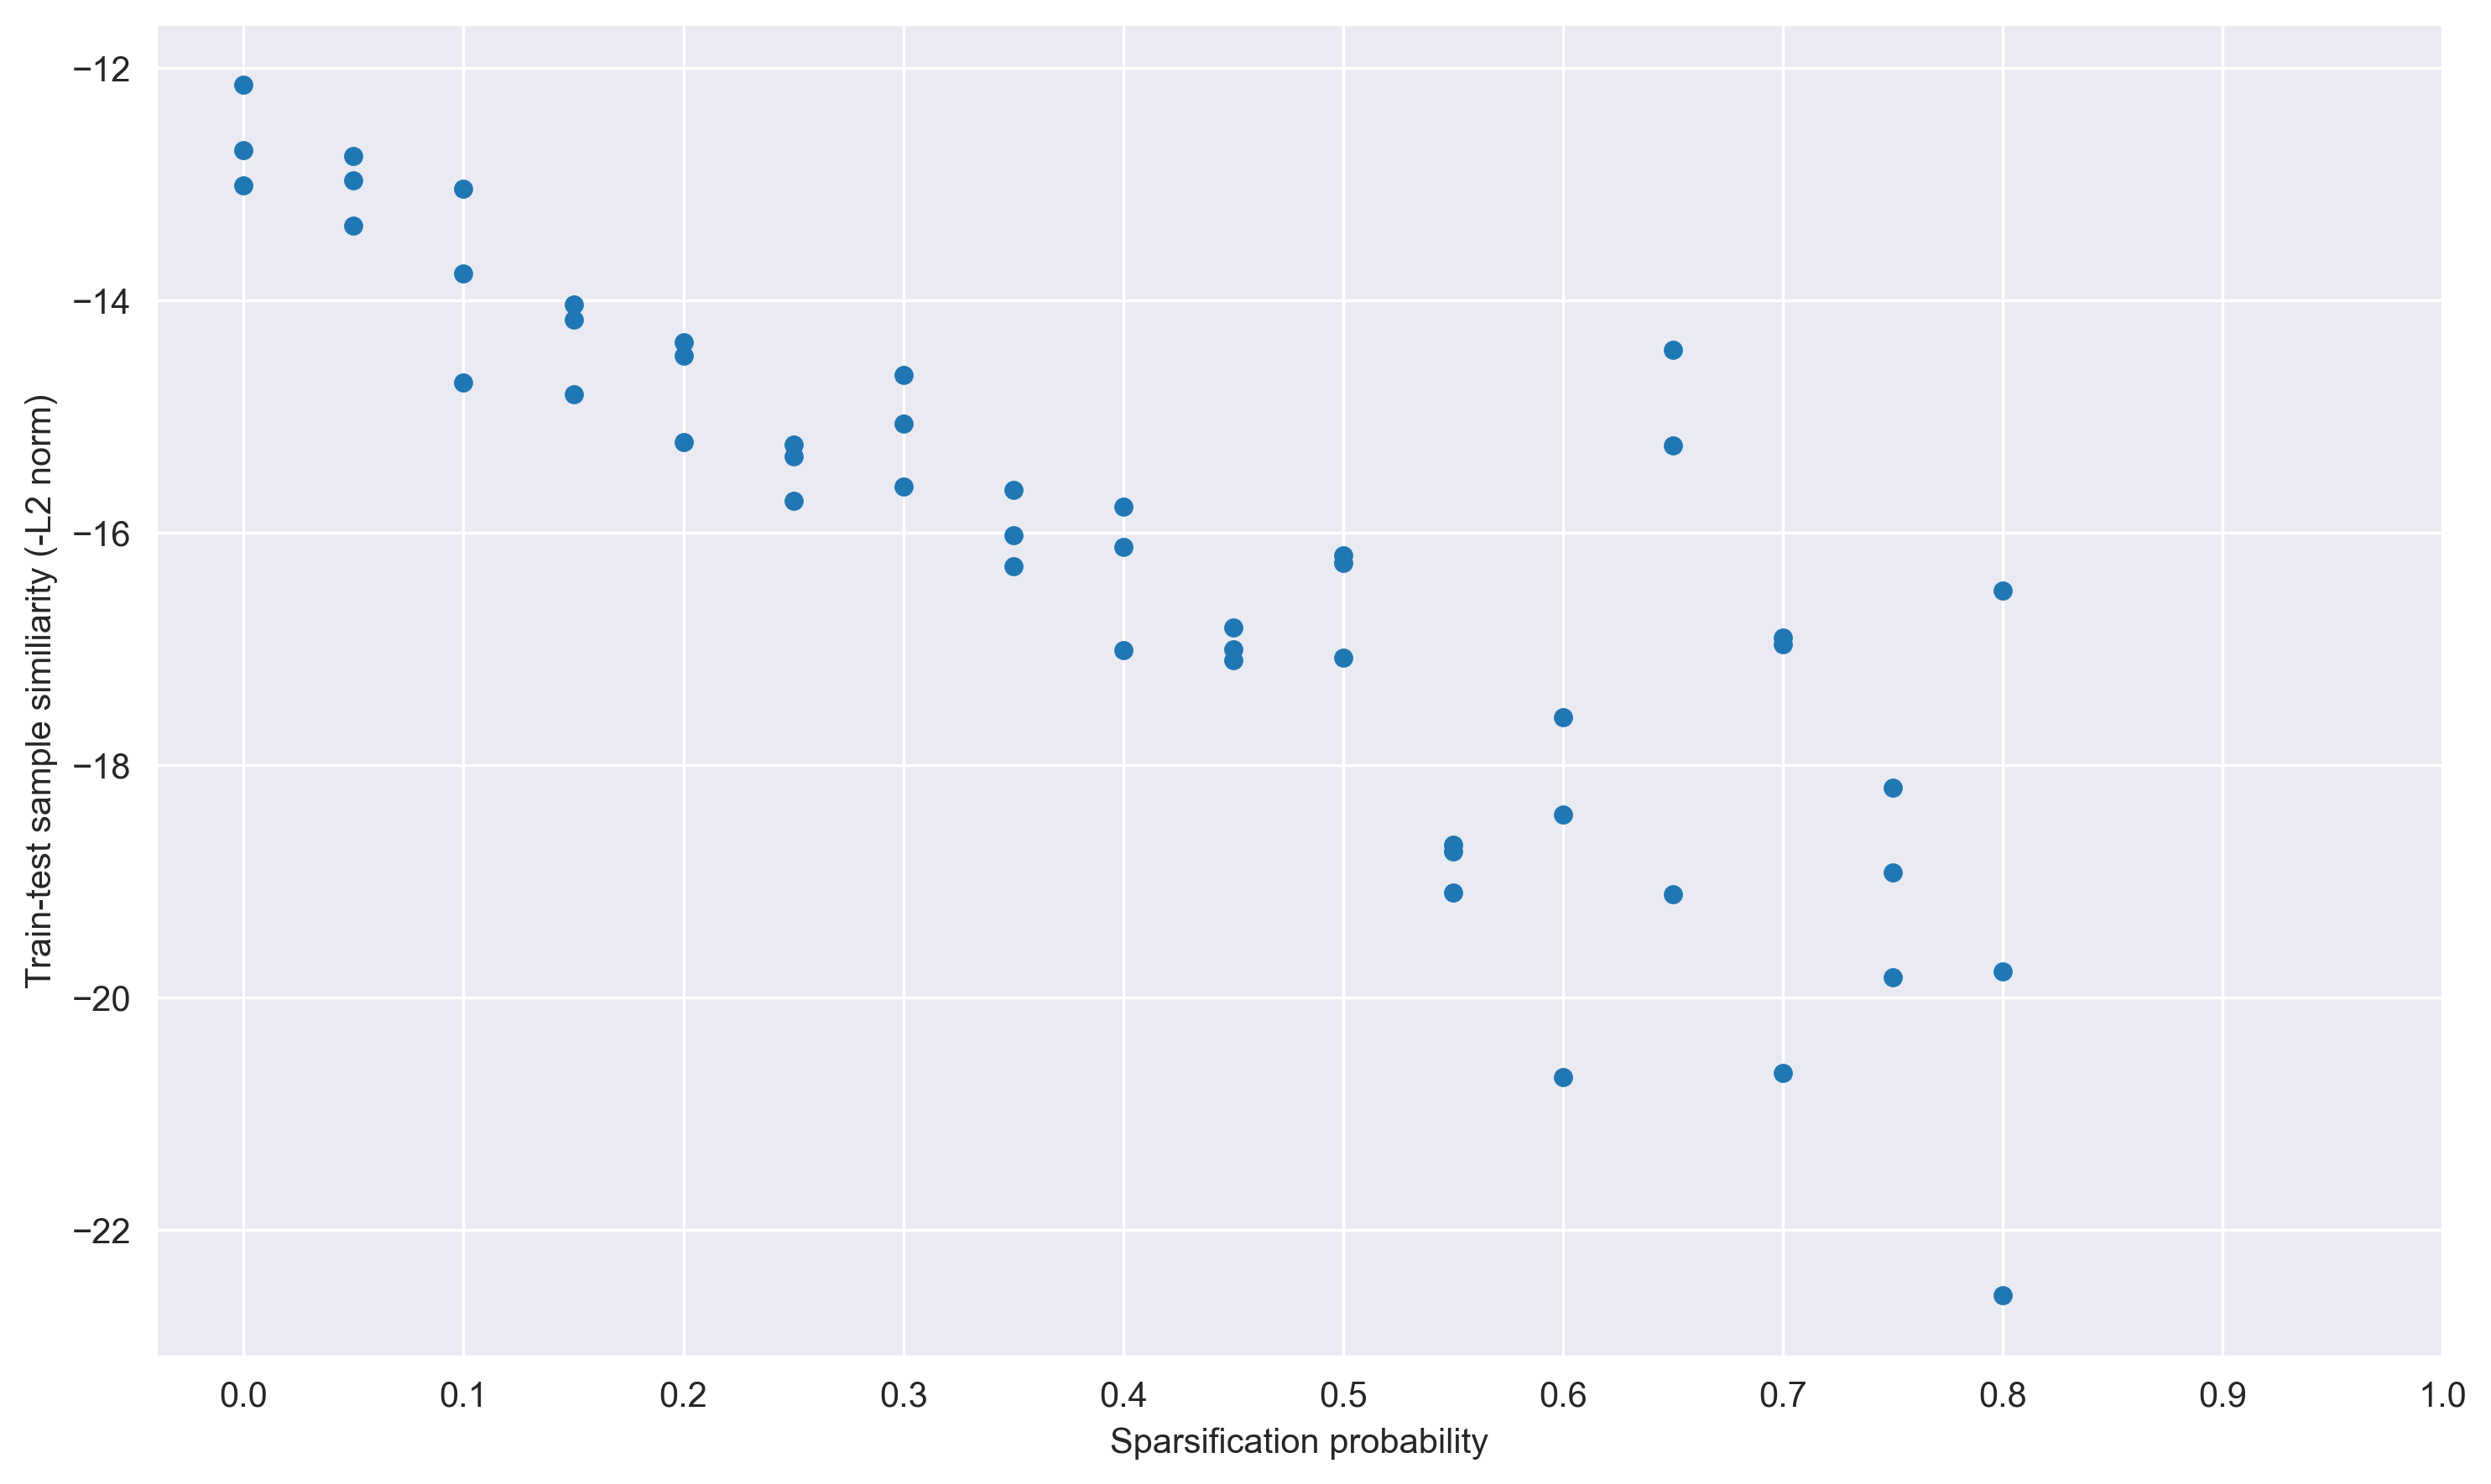

In [13]:
# set dpi to 300 
stats = sc_spectra.return_all_split_stats()
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(stats['SPECTRA_parameter'], stats['cross_split_overlap'], s=20)
# plt.plot(stats['SPECTRA_parameter'], stats['cross_split_overlap'], marker='o', linestyle='-', color='b')
plt.xlabel('Sparsification probability')
plt.xticks(np.arange(0, 1.05, 0.1))
plt.ylabel('Train-test sample similiarity (-L2 norm)')
plt.tight_layout()
# save figure
plt.savefig('similarity_across_splits.pdf')

In [14]:
stats

{'SPECTRA_parameter': [0.15,
  0.3,
  0.55,
  0.7,
  0.45,
  0.6,
  0.05,
  0.2,
  0.1,
  0.5,
  0.35,
  0.75,
  0.5,
  0.1,
  0.75,
  0.35,
  0.4,
  0.0,
  0.65,
  0.25,
  0.0,
  0.4,
  0.8,
  0.25,
  0.65,
  0.7,
  0.3,
  0.55,
  0.15,
  0.3,
  0.7,
  0.15,
  0.55,
  0.2,
  0.6,
  0.05,
  0.45,
  0.6,
  0.2,
  0.45,
  0.05,
  0.75,
  0.5,
  0.35,
  0.1,
  0.8,
  0.25,
  0.0,
  0.8,
  0.65,
  0.4],
 'number': '2',
 'train_size': [53,
  32,
  13,
  8,
  18,
  8,
  74,
  40,
  64,
  16,
  25,
  5,
  15,
  64,
  5,
  25,
  24,
  81,
  6,
  38,
  81,
  21,
  4,
  36,
  8,
  7,
  31,
  13,
  52,
  32,
  6,
  53,
  12,
  45,
  9,
  70,
  23,
  10,
  46,
  20,
  74,
  4,
  16,
  27,
  61,
  4,
  36,
  81,
  5,
  7,
  22],
 'test_size': [14,
  8,
  4,
  2,
  5,
  3,
  19,
  11,
  16,
  4,
  7,
  2,
  4,
  17,
  2,
  7,
  7,
  21,
  2,
  10,
  21,
  6,
  2,
  10,
  3,
  2,
  8,
  4,
  13,
  9,
  2,
  14,
  4,
  12,
  3,
  18,
  6,
  3,
  12,
  5,
  19,
  2,
  4,
  7,
  16,
  2,
  10,
  21,
  2

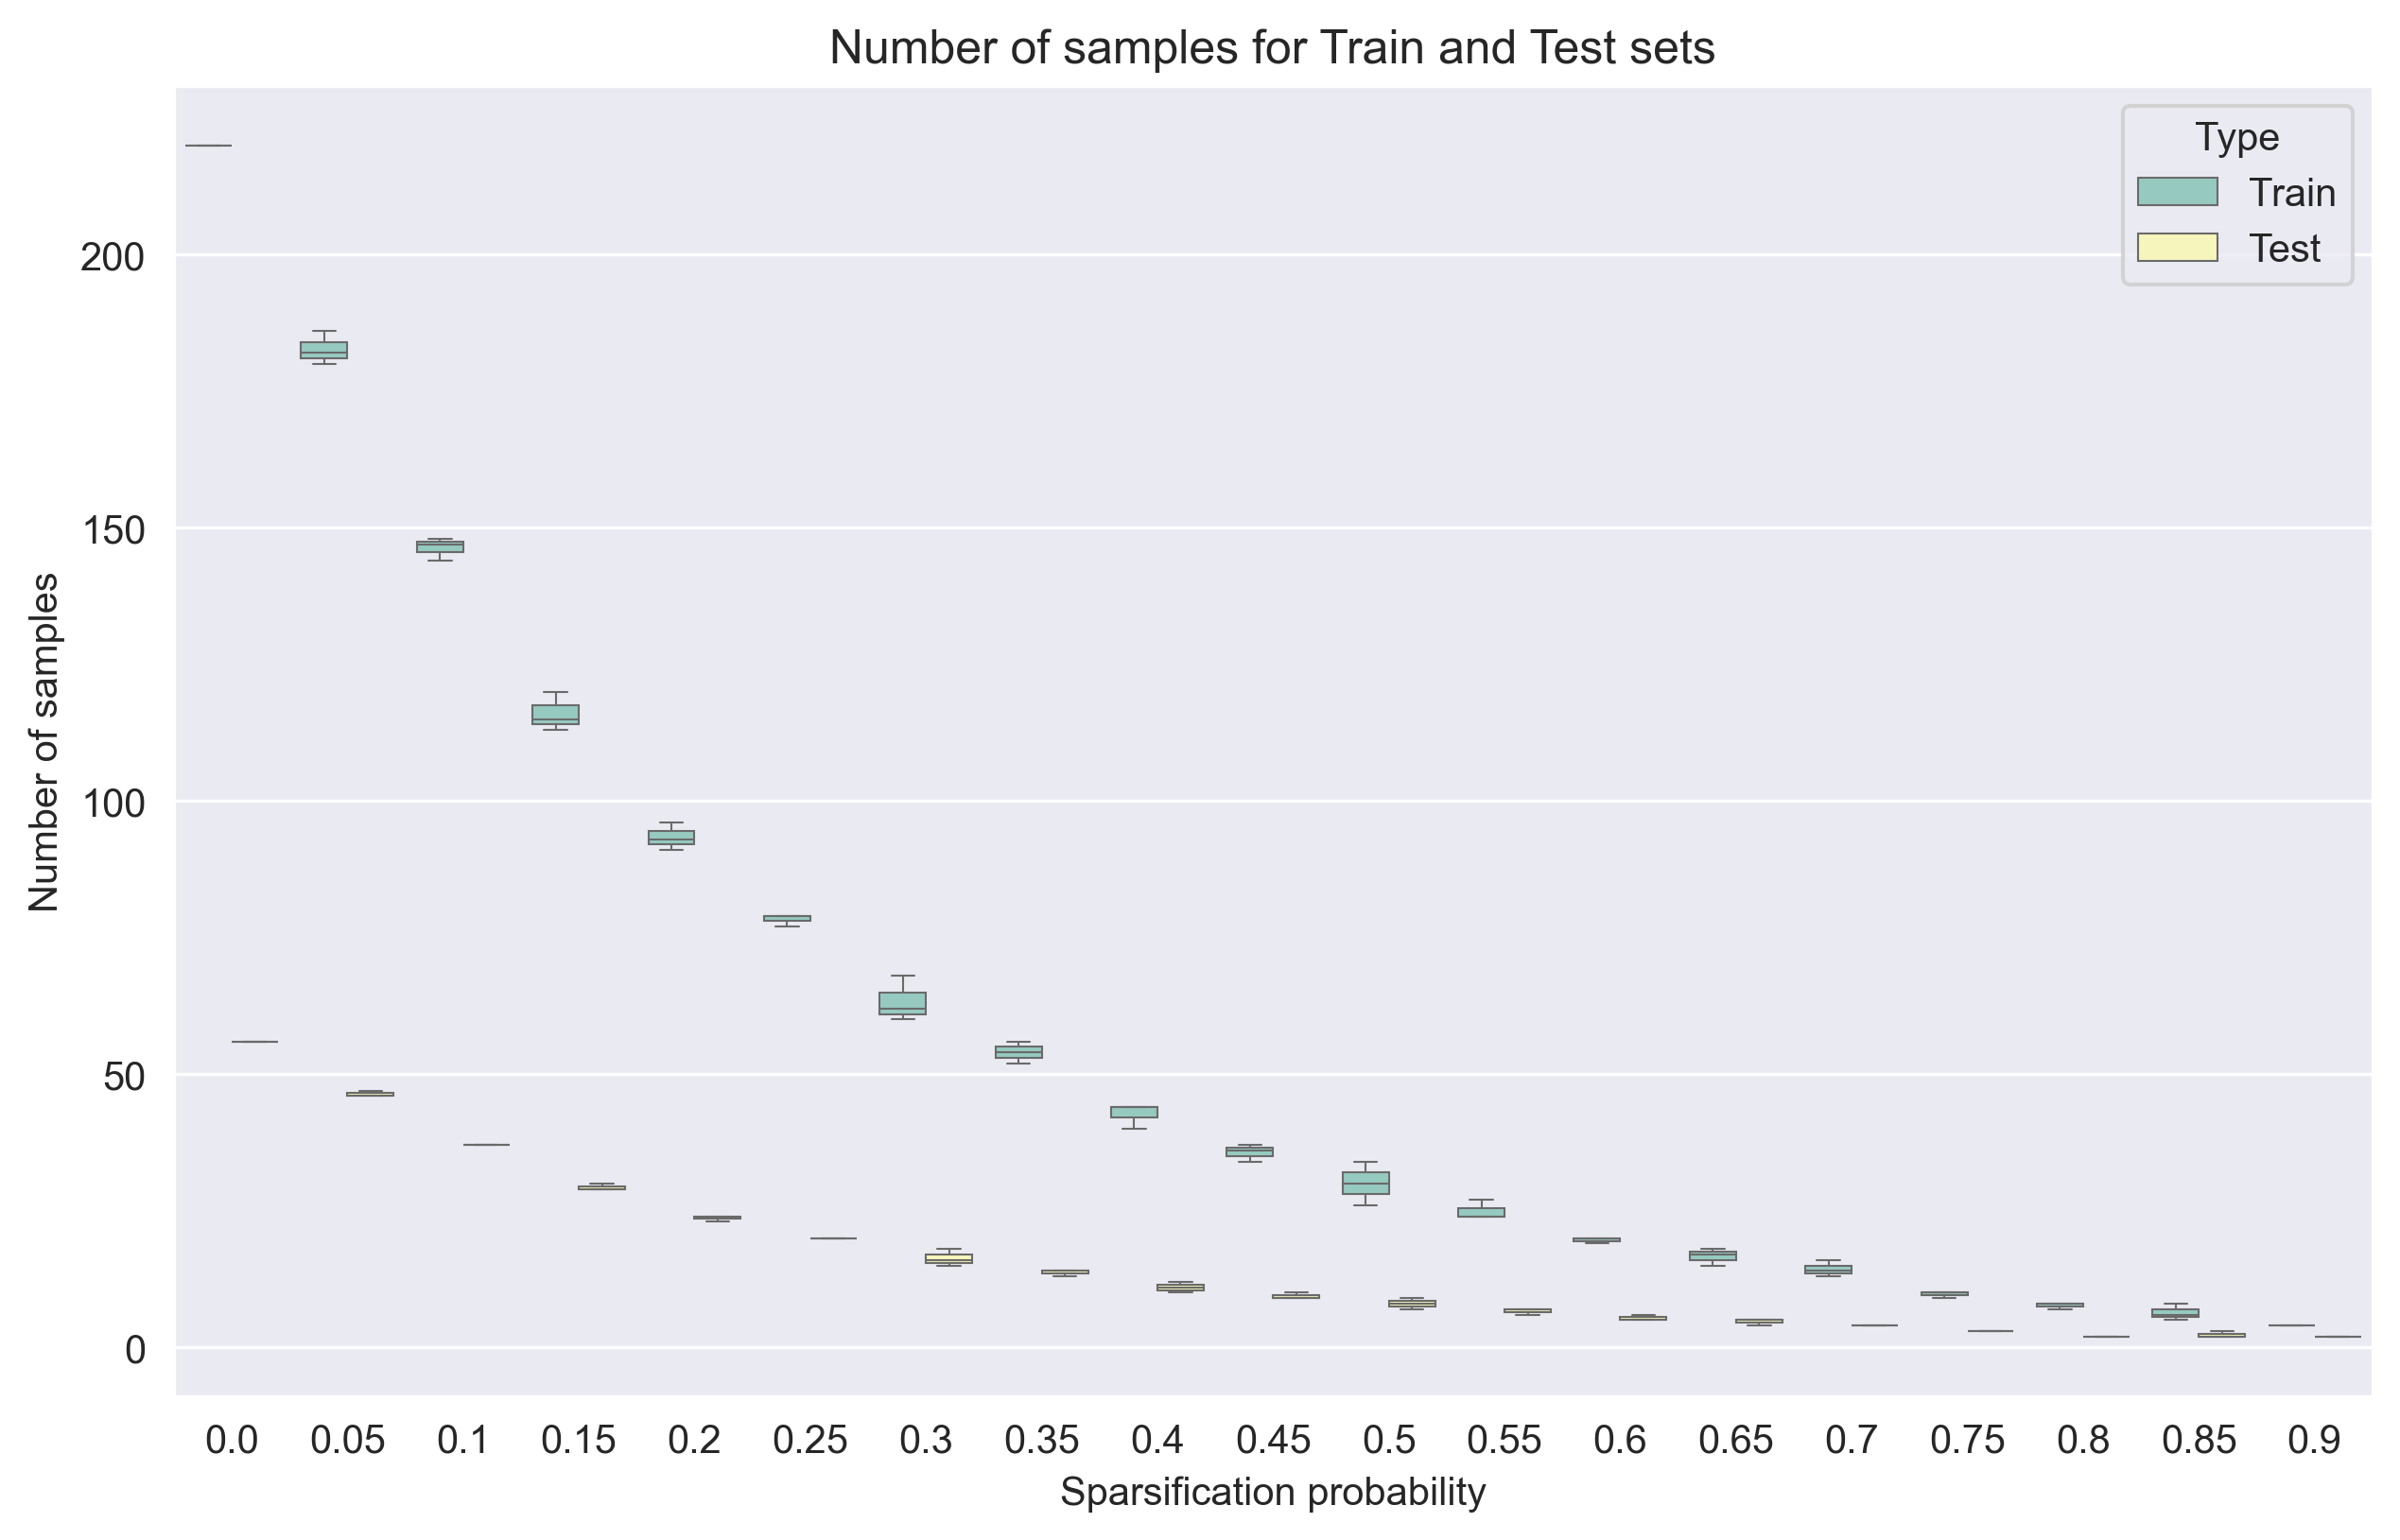

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convert the data to a DataFrame for easier manipulation
df_train = pd.DataFrame({
    'SPECTRA_parameter': stats['SPECTRA_parameter'],
    'Size': stats['train_size'],
    'Type': ['Train'] * len(stats['SPECTRA_parameter'])
})

df_test = pd.DataFrame({
    'SPECTRA_parameter': stats['SPECTRA_parameter'],
    'Size': stats['test_size'],
    'Type': ['Test'] * len(stats['SPECTRA_parameter'])
})

# Concatenate the dataframes
df = pd.concat([df_train, df_test])

# Create boxplots
plt.figure(figsize=(10, 6), dpi=300)
sns.boxplot(x='SPECTRA_parameter', y='Size', hue='Type', data=df, palette="Set3", linewidth=0.5)
plt.xlabel('Sparsification probability')
plt.ylabel('Number of samples')
plt.title('Number of samples for Train and Test sets')
plt.show()

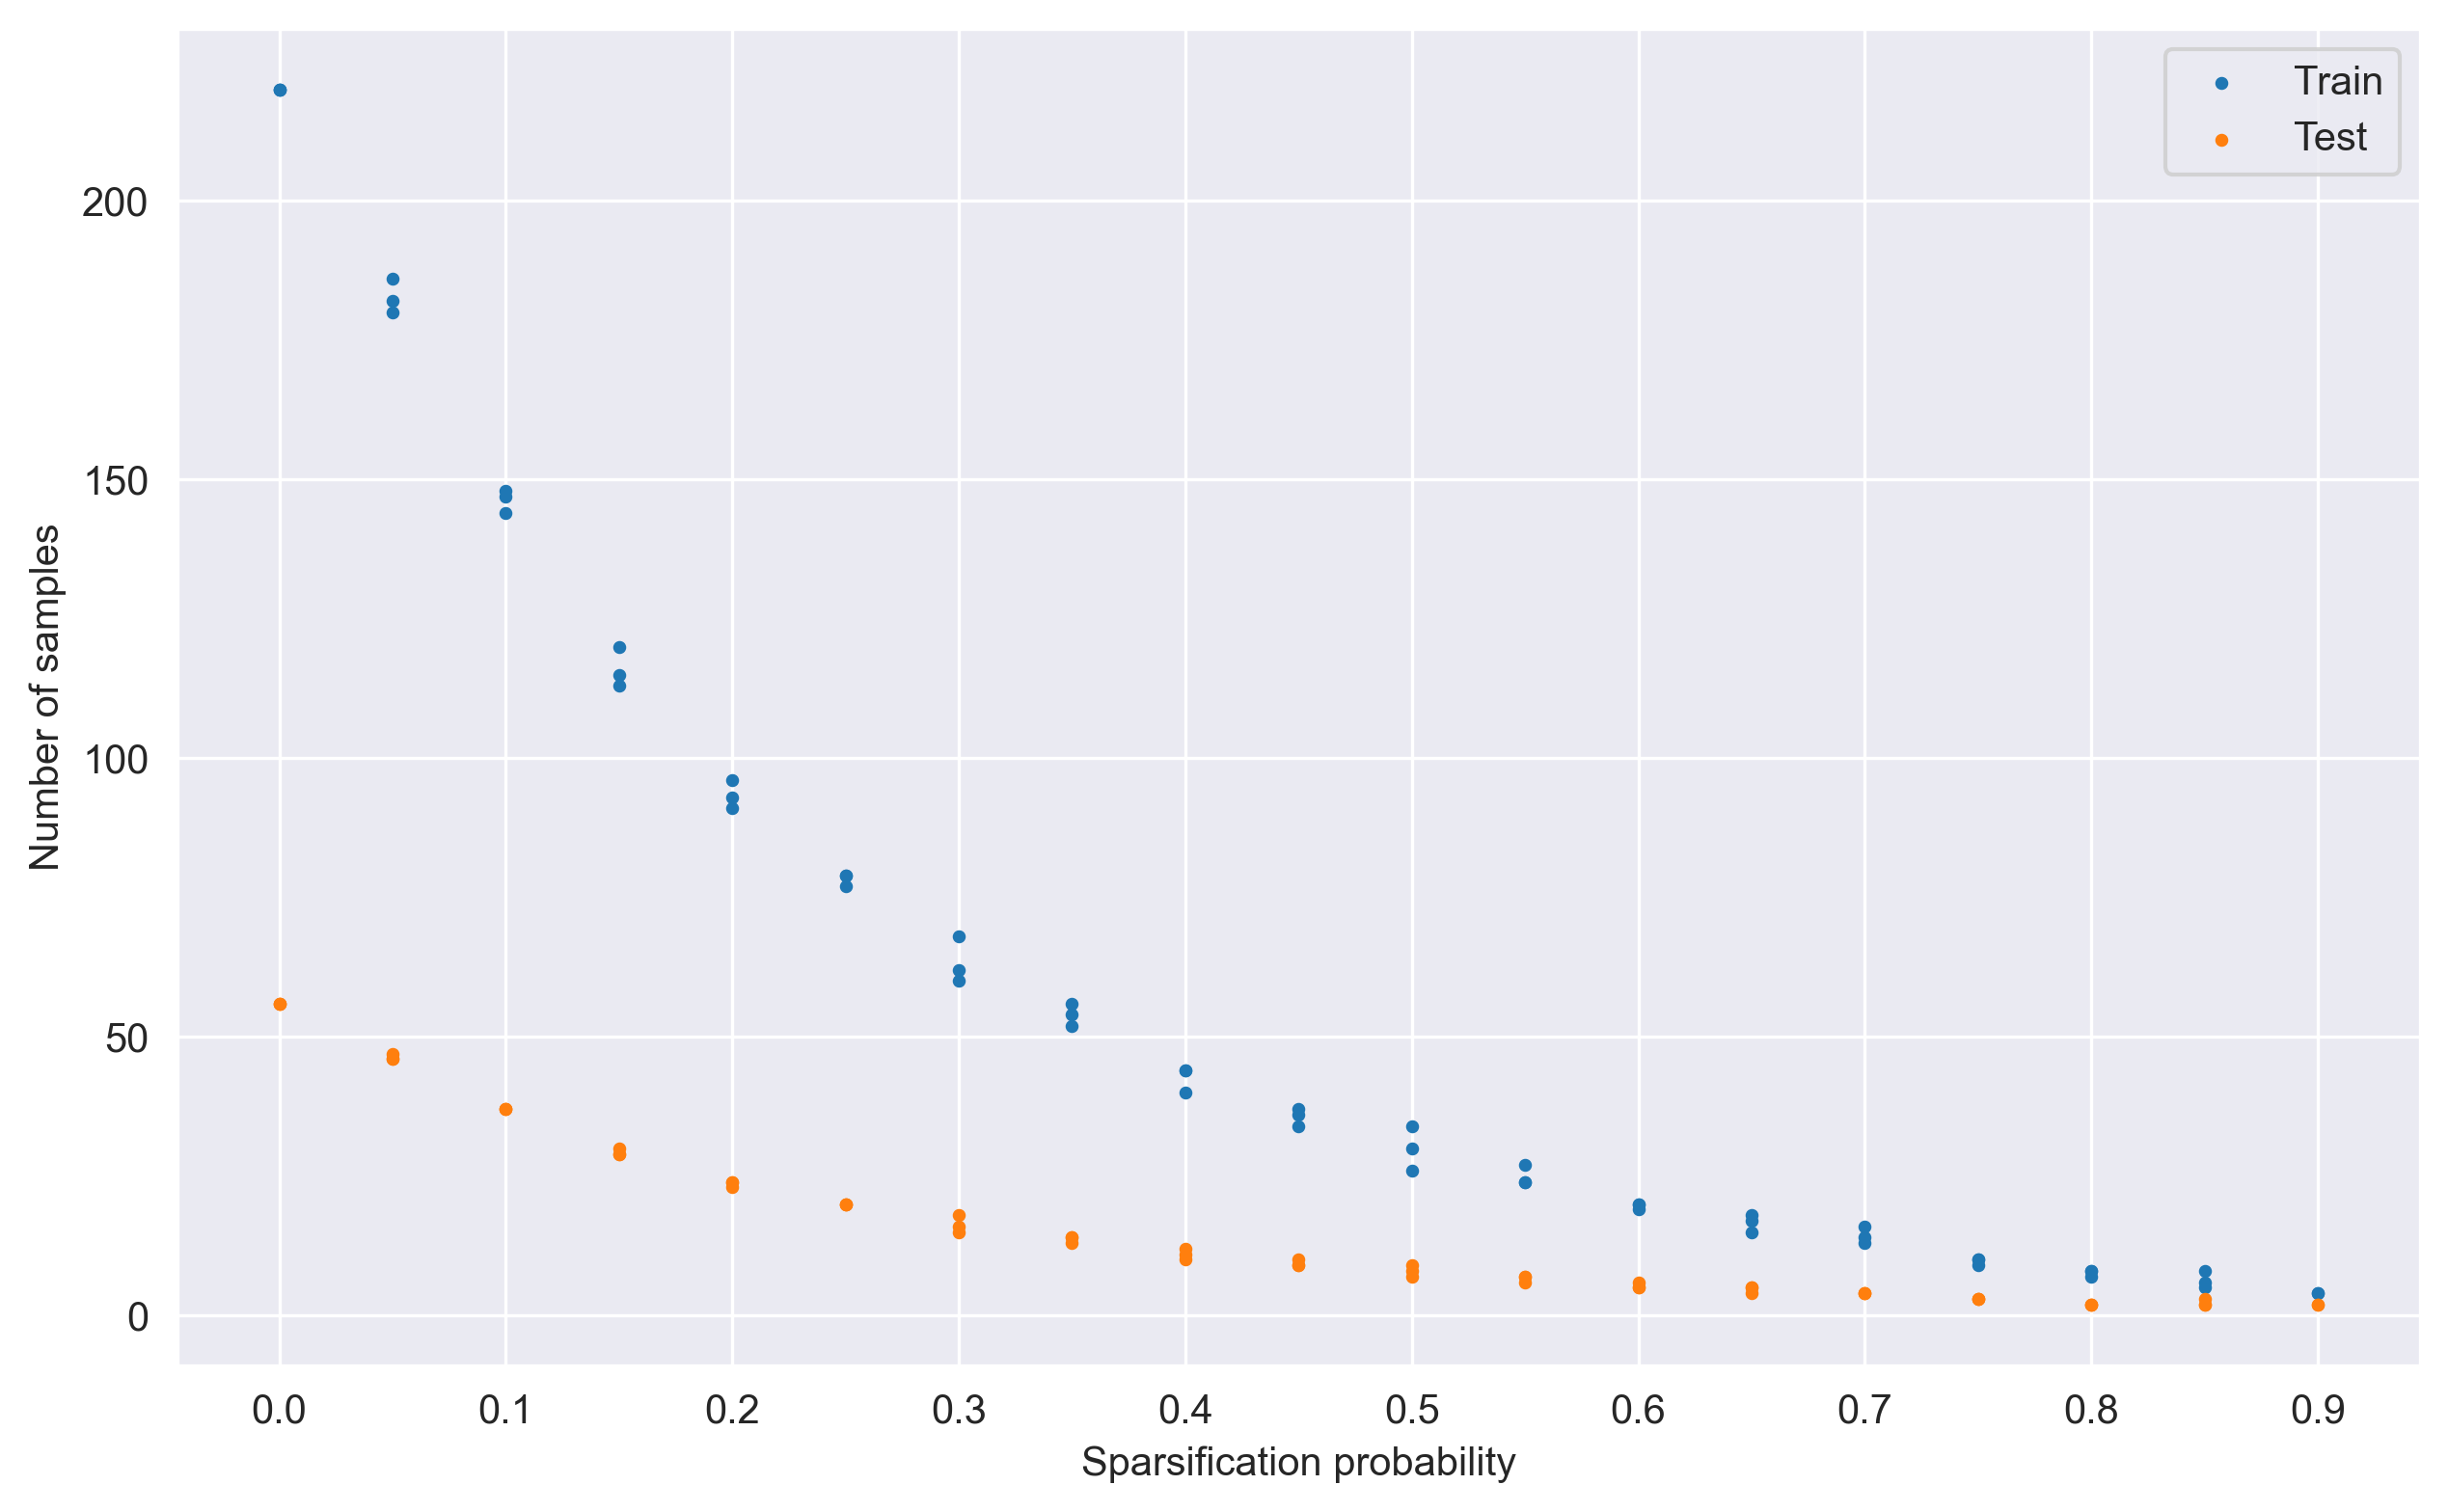

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the data to a DataFrame for easier manipulation
df_train = pd.DataFrame({
    'SPECTRA_parameter': stats['SPECTRA_parameter'],
    'Size': stats['train_size'],
    'Type': ['Train'] * len(stats['SPECTRA_parameter'])
})

df_test = pd.DataFrame({
    'SPECTRA_parameter': stats['SPECTRA_parameter'],
    'Size': stats['test_size'],
    'Type': ['Test'] * len(stats['SPECTRA_parameter'])
})

# Concatenate the dataframes
df = pd.concat([df_train, df_test])

# Create scatter plots
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(df[df['Type'] == 'Train']['SPECTRA_parameter'], df[df['Type'] == 'Train']['Size'], color='tab:blue', label='Train', s=5)
plt.scatter(df[df['Type'] == 'Test']['SPECTRA_parameter'], df[df['Type'] == 'Test']['Size'], color='tab:orange', label='Test', s=5)
plt.xticks(np.arange(0, 1, 0.1)) 
plt.xlabel('Sparsification probability')
plt.ylabel('Number of samples')
plt.legend()
plt.savefig('num_samples_across_splits_norman.pdf')

In [7]:
all_perts_orig = [p for p in sg_pert_adata.obs['condition'].unique() if p != 'ctrl']

all_perts_map = {i: pert for i, pert in enumerate(all_perts_orig)}

In [8]:
perts = PerturbGraphData.parse(perturb_graph_data, sg_pert_adata)
perts

['TSC22D1',
 'MAML2',
 'CEBPE',
 'DUSP9',
 'ELMSAN1',
 'UBASH3B',
 'FOXA1',
 'BCORL1',
 'MEIS1',
 'GLB1L2',
 'KLF1',
 'BAK1',
 'FEV',
 'ATL1',
 'CBL',
 'ETS2',
 'SET',
 'TBX3',
 'LHX1',
 'SLC4A1',
 'RREB1',
 'ZNF318',
 'COL2A1',
 'ZBTB25',
 'MAP4K5',
 'SLC6A9',
 'MIDN',
 'DLX2',
 'CBFA2T3',
 'HES7',
 'AHR',
 'FOXO4',
 'RHOXF2',
 'SPI1',
 'RUNX1T1',
 'S1PR2',
 'POU3F2',
 'CNN1',
 'CELF2',
 'MAP2K3',
 'MAP4K3',
 'SAMD1',
 'CDKN1A',
 'PTPN1',
 'TBX2',
 'IER5L',
 'CEBPA',
 'PTPN12',
 'TP73',
 'MAP7D1',
 'FOSB',
 'MAPK1',
 'IRF1',
 'IKZF3',
 'HOXB9',
 'HOXC13',
 'CKS1B',
 'CLDN6',
 'FOXA3',
 'COL1A1',
 'FOXF1',
 'ZBTB1',
 'PRTG',
 'PLK4',
 'BPGM',
 'ARRDC3',
 'BCL2L11',
 'LYL1',
 'MAP2K6',
 'SGK1',
 'CDKN1B',
 'FOXL2',
 'NIT1',
 'IGDCC3',
 'OSR2',
 'HNF4A',
 'KMT2A',
 'ISL2',
 'TMSB4X',
 'KIF2C',
 'CSRNP1',
 'ARID1A',
 'CNNM4',
 'UBASH3A',
 'NCL',
 'ZC3HAV1',
 'PTPN9',
 'STIL',
 'CEBPB',
 'TGFBR2',
 'JUN',
 'ZBTB10',
 'PTPN13',
 'SLC38A2',
 'HOXA13',
 'SNAI1',
 'CITED1',
 'PRDM1',
 'HK2',
 

In [9]:
sp_ids = ["0.00", "0.10", "0.20", "0.30", "0.40", "0.50", "0.60", "0.70"]
replicates = 3 
all_sps = [f"{x}_{y}" for x in sp_ids for y in range(replicates)]
all_sps

['0.00_0',
 '0.00_1',
 '0.00_2',
 '0.10_0',
 '0.10_1',
 '0.10_2',
 '0.20_0',
 '0.20_1',
 '0.20_2',
 '0.30_0',
 '0.30_1',
 '0.30_2',
 '0.40_0',
 '0.40_1',
 '0.40_2',
 '0.50_0',
 '0.50_1',
 '0.50_2',
 '0.60_0',
 '0.60_1',
 '0.60_2',
 '0.70_0',
 '0.70_1',
 '0.70_2']

In [6]:
# open split 0.7 in ../data/splits/perturb/norman/norman_SPECTRA_splits
with open('../data/splits/perturb/norman/norman_SPECTRA_splits/SP_0.60_1/test.pkl', 'rb') as f:
    spectra_splits = pkl.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../data/splits/perturb/norman/norman_SPECTRA_splits/SP_0.60_1/test.pkl'

In [10]:
split_map = {}
for split in all_sps:
    split_id = f'SP_{split}'
    with open(f'../../data/splits/perturb/norman/norman_SPECTRA_splits/{split_id}/test.pkl', 'rb') as f:
        spectra_splits = pkl.load(f)
    test_perts = [all_perts_map[split] for split in spectra_splits]
    split_map[split_id] = test_perts

In [11]:
split_map

{'SP_0.00_0': ['SNAI1',
  'PTPN12',
  'COL2A1',
  'CITED1',
  'NIT1',
  'KLF1',
  'FOXF1',
  'CSRNP1',
  'ZBTB10',
  'ARID1A',
  'CEBPB',
  'SLC4A1',
  'KIF18B',
  'FOSB',
  'PTPN1',
  'CBFA2T3',
  'SET',
  'SAMD1',
  'ZBTB1',
  'BAK1',
  'HK2'],
 'SP_0.00_1': ['ZC3HAV1',
  'LYL1',
  'SPI1',
  'ETS2',
  'S1PR2',
  'TSC22D1',
  'TMSB4X',
  'CKS1B',
  'TBX3',
  'CELF2',
  'AHR',
  'FEV',
  'COL2A1',
  'MEIS1',
  'FOSB',
  'HOXB9',
  'ZBTB1',
  'ZNF318',
  'PTPN13',
  'TP73',
  'FOXA1'],
 'SP_0.00_2': ['SET',
  'CEBPB',
  'MAP4K3',
  'SLC6A9',
  'LHX1',
  'MAP2K3',
  'BAK1',
  'OSR2',
  'CITED1',
  'TP73',
  'ZNF318',
  'ELMSAN1',
  'JUN',
  'FOXA1',
  'BCORL1',
  'SGK1',
  'HNF4A',
  'ETS2',
  'KIF2C',
  'MAP7D1',
  'COL1A1'],
 'SP_0.10_0': ['PTPN9',
  'ARID1A',
  'JUN',
  'CNNM4',
  'DUSP9',
  'IER5L',
  'IRF1',
  'CDKN1A',
  'MAP2K3',
  'TGFBR2',
  'ZBTB1',
  'HNF4A',
  'HOXC13',
  'CSRNP1',
  'FOXL2',
  'CKS1B'],
 'SP_0.10_1': ['FOXA3',
  'RREB1',
  'CNNM4',
  'SGK1',
  'CITED1',
  'F

In [20]:
genes_to_keep = ['TP73', 'JUN', 'NIT1', 'CITED1', 'PTPN13', 'HNF4A', 'ZBTB10', 'ARID1A', 'KIF18B', 'CKS1B', 'AHR']

In [21]:
split_map_reduced = {k: v for k, v in split_map.items() if '0.00' in k or '0.70' in k}
split_map_reduced

{'SP_0.00_0': ['SNAI1',
  'PTPN12',
  'COL2A1',
  'CITED1',
  'NIT1',
  'KLF1',
  'FOXF1',
  'CSRNP1',
  'ZBTB10',
  'ARID1A',
  'CEBPB',
  'SLC4A1',
  'KIF18B',
  'FOSB',
  'PTPN1',
  'CBFA2T3',
  'SET',
  'SAMD1',
  'ZBTB1',
  'BAK1',
  'HK2'],
 'SP_0.00_1': ['ZC3HAV1',
  'LYL1',
  'SPI1',
  'ETS2',
  'S1PR2',
  'TSC22D1',
  'TMSB4X',
  'CKS1B',
  'TBX3',
  'CELF2',
  'AHR',
  'FEV',
  'COL2A1',
  'MEIS1',
  'FOSB',
  'HOXB9',
  'ZBTB1',
  'ZNF318',
  'PTPN13',
  'TP73',
  'FOXA1'],
 'SP_0.00_2': ['SET',
  'CEBPB',
  'MAP4K3',
  'SLC6A9',
  'LHX1',
  'MAP2K3',
  'BAK1',
  'OSR2',
  'CITED1',
  'TP73',
  'ZNF318',
  'ELMSAN1',
  'JUN',
  'FOXA1',
  'BCORL1',
  'SGK1',
  'HNF4A',
  'ETS2',
  'KIF2C',
  'MAP7D1',
  'COL1A1'],
 'SP_0.70_0': ['CEBPA', 'SLC4A1'],
 'SP_0.70_1': ['IKZF3', 'AHR'],
 'SP_0.70_2': ['CEBPE', 'GLB1L2']}

In [22]:
def filter_dict_by_list(input_dict, filter_list):
    filtered_dict = {}
    for key, values in input_dict.items():
        filtered_values = [value for value in values if value in filter_list]
        if filtered_values:
            filtered_dict[key] = filtered_values
    return filtered_dict

In [23]:
split_map_reduced = filter_dict_by_list(split_map_reduced, genes_to_keep)
split_map_reduced

{'SP_0.00_0': ['CITED1', 'NIT1', 'ZBTB10', 'ARID1A', 'KIF18B'],
 'SP_0.00_1': ['CKS1B', 'AHR', 'PTPN13', 'TP73'],
 'SP_0.00_2': ['CITED1', 'TP73', 'JUN', 'HNF4A'],
 'SP_0.70_1': ['AHR']}

In [51]:
# save the pert_split_map dict to a pkl file to data 
with open('../../data/splits/perturb/norman/pert_split_map.pkl', 'wb') as f:
    pkl.dump(split_map, f)

In [56]:
pert_names = []
for split in spectra_splits:
    pert_name = all_perts_map[split]
    pert_names.append(pert_name)
pert_names

['HOXC13', 'COL1A1', 'MAP2K6']

In [24]:
def update_yaml_config(file_path, new_eval_pert):
    yaml = YAML()
    yaml.preserve_quotes = True
    yaml.indent(mapping=2, sequence=4, offset=2)

    with open(file_path, 'r') as f:
        config = yaml.load(f)

    # Update the eval_pert value
    config['data']['eval_pert'] = new_eval_pert

    # Save the updated config
    with open(file_path, 'w') as f:
        yaml.dump(config, f)

In [25]:
 from ruamel.yaml import YAML 

base_config = '../../configs/experiment/mlp_norman_inference.yaml'
yaml = YAML()
yaml.preserve_quotes = True
yaml.indent(mapping=2, sequence=4, offset=2)

with open(base_config, 'r') as f:
    config = yaml.load(f)
config

{'model_type': 'mlp', 'defaults': [{'override /model': 'mlp'}, {'override /logger': 'wandb'}], 'total_genes': 2061, 'emb_dim': 2061, 'train_date': '2024-08-06', 'timestamp': '14-32-22', 'data': {'data_name': 'norman', 'deg_eval': True, 'eval_pert': 'IKZF3', 'split': 0.7, 'replicate': 1, 'fm': 'raw_expression'}, 'trainer': {'num_sanity_val_steps': 0, 'inference_mode': True}, 'ckpt_path': '${paths.log_dir}train/runs/${train_date}/${timestamp}/checkpoints/${callbacks.model_checkpoint.filename}', 'logger': {'wandb': {'tags': ['eval', 'norman', '${data.eval_pert}', '${data.fm}', 'split_${data.split}', 'replicate_${data.replicate}'], 'group': 'test_mean_norman_${data.split}', 'project': 'perturbench-deg'}}}

In [1]:
import os 
if not os.path.exists(f'../../configs/experiment/deg_evals/'):
    os.makedirs(f'../../configs/experiment/deg_evals/')

id = 1
for i, (key, perts) in enumerate(split_map_reduced.items()):
    split = float(key.split('_')[1])
    replicate = int(key.split('_')[2])
    config['data']['split'] = split
    config['data']['replicate'] = replicate
    for j, pert in enumerate(perts):
        config['data']['eval_pert'] = pert
        with open(f'../../configs/experiment/deg_evals/mlp_norman_inference_{id}.yaml', 'w') as f:
            yaml.dump(config, f)
        id += 1 

NameError: name 'split_map_reduced' is not defined